# Plotting range compressed wavelet and how it changes with target location

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wavelet params

In [2]:
c     = 299792458    # speed of light          [m/s]
rho_0 = 25e3 + 10e3  # slant range             [m]
d_rho = 300          # range resolution        [m]
lam   = 33.3         # wavelenth in free space [m]
rho_w = 30000        # tx/rx window            [m]
smpl  = 48e6         # sampling rate           [Hz]

# range bins
rb    = int((rho_w / c) / (1 / smpl))

print(f"Range bins: {rb}")

# sampled slant range of echo
rho = np.linspace(rho_0 - rho_w / 2, rho_0 + rho_w / 2, rb)

Range bins: 4803


## Comp wavelet

In [3]:
v = np.sinc((rho - rho_0) / d_rho) * np.exp(2j * ((2 * np.pi) / lam) * rho_0)

## Plot wavelet

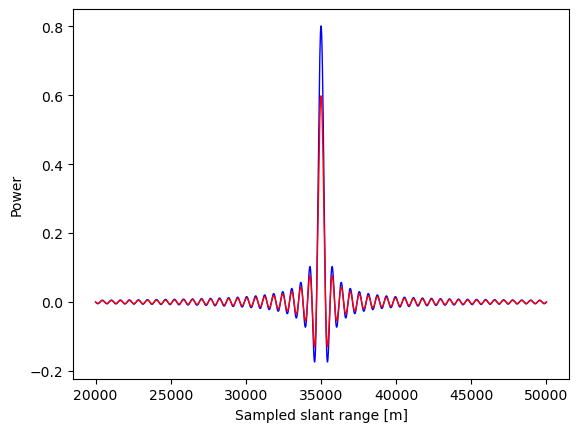

In [4]:
plt.plot(rho, np.real(v), color="blue", linewidth=1)
plt.plot(rho, np.imag(v), color="red", linewidth=1)
plt.xlabel("Sampled slant range [m]")
plt.ylabel("Power")
plt.show()

## Match filter the target waveform

In [5]:
k = (2 * np.pi) / lam
phase = np.exp(-2j * k * rho_0)

In [6]:
v_mf = v * phase

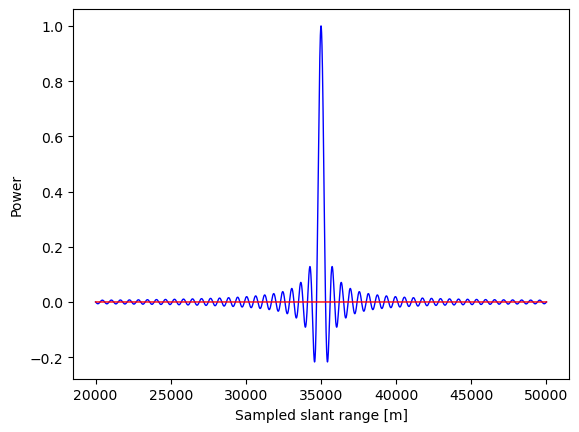

In [7]:
plt.plot(rho, np.real(v_mf), color="blue", linewidth=1)
plt.plot(rho, np.imag(v_mf), color="red", linewidth=1)
plt.xlabel("Sampled slant range [m]")
plt.ylabel("Power")
plt.show()